## Symmetrized split-step Fourier transform simulation for single mode waveguide 

In [1]:
# by Uğur Teğin at 10.09.2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def pas_fib(E,steps, dispFib, gamma,dz):
    Ain = E
    for i in range(int(steps)):
      Einf=np.fft.fftshift(np.fft.fft(Ain))
      Ein2=np.fft.ifft(np.fft.ifftshift(Einf*dispFib))
      Eout = Ein2
      
      NL = 1j*gamma*np.abs(Eout)**2
      Eout = Eout*np.exp(NL*dz)
      
      Einf=np.fft.fftshift(np.fft.fft(Eout))
      Ain=np.fft.ifft(np.fft.ifftshift(Einf*dispFib))
    return Ain

In [4]:
c = 299792458       # [m/s]
lambda_c = 1030e-9  # Center wavelength of the simulation [m]
## TIME DOMAIN
timesteps = (2**11)
timewidth = 60e-12          # Width of the time window in [s]
tres = timewidth/timesteps  # Resolution of the time window in [s]  
t = np.arange(-timewidth*0.5,(timewidth*0.5),tres) # Time in [s]

In [5]:
## FOURIER DOMAIN
fs=1/timewidth
freq = c/lambda_c+fs*np.linspace(-timesteps/2,timesteps/2,num = timesteps) # Frequency grid [Hz]
wave=c/freq # Wavelength [m]
w=2*np.pi*c/lambda_c # Angular center frequency [Hz]
omegas=2*np.pi*freq  # Angular frequency grid
wt = omegas-w # Normalized angular frequency grid

In [6]:
n2 = 2.7e-20       #Kerr coefficient (m^2/W)
beta2 = 24.8e-27
beta3 = 23.3e-42
gamma = (w*n2)/(c*(np.pi*(3e-6)**2)) 

In [7]:
fiblens = 0.1            #Length of the fiber in (m)
dz = 1e-3                #Single step of the simulation
nsteps = fiblens / dz    #Number of steps
dispFib = np.exp(((-0.5*1j*beta2)*(-1j*(wt))**2)+((beta3/6)*(-1j*(wt))**3)*dz/2)

In [8]:
energy = 500e-12 # Pulse energy [J] if noise 0.02 nJ
duration = 500e-15 
## Starting from noise
#E = np.random.rand(timesteps)
#E = E*np.sqrt(energy/np.trapz(np.abs(E)**2,t))

## Starting from Gaussian pulse
E=np.sqrt(energy/duration)*0.969215*np.exp(-0.5*(t/duration)**2*4*np.log(2)) # [kW^0.5]
print(np.trapezoid(np.abs(E)**2,t)*1e12)
E0 = E

499.96829885506907


In [9]:
E = pas_fib(E,nsteps, dispFib, gamma, dz)

/var/folders/vk/yf83m6k91673zccgtvkj137h0000gn/T/ipykernel_3887/1600404411.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(wave*1e9,10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(E0)))**2))


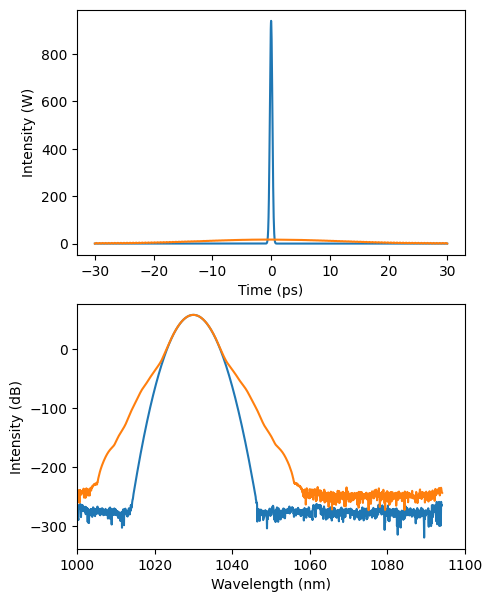

In [10]:
plt.figure(figsize=(5,7))
plt.subplot(2, 1, 1)
plt.plot(t*1e12,np.abs(E0)**2)
plt.plot(t*1e12,np.abs(E)**2)
plt.xlabel('Time (ps)')
plt.ylabel('Intensity (W)')
plt.subplot(2, 1, 2)
plt.plot(wave*1e9,10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(E0)))**2))
plt.plot(wave*1e9,10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(E)))**2))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dB)')
plt.xlim(1000,1100)
plt.show()